In [1]:
from utils.game import *
from utils.agent import *
from utils.world import *
from utils.viz import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import json

import geopandas as gpd
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


def gen_presence_map(nb_player, map_graph):
    presence_map_start = np.zeros((nb_player, len(map_graph)))
    for i in range(len(map_graph)):
        presence_map_start[np.random.randint(0, nb_player), i] = np.random.randint(1, 5)
    return presence_map_start


def read_empty_map_from_json(path):
    with open(path, 'r') as f:
        map_dict = json.load(f)
    
    map_graph = np.array(map_dict["map_graph"])
    layout = map_dict["layout"]
    countries = map_dict["countries"]
    nb_territories = len(countries)

    # Change countries  and layout keys to integers
    countries = {int(k): v for k, v in countries.items()}
    layout = {int(k): v for k, v in layout.items()}

    return map_graph, layout, countries, nb_territories


def read_ready_map_from_json(path):
    with open(path, 'r') as f:
        map_dict = json.load(f)
    
    map_graph = np.array(map_dict["map_graph"])
    layout = map_dict["layout"]
    countries = map_dict["countries"]
    nb_territories = len(countries)

    colors = map_dict["colors"]
    nb_players = map_dict["nb_players"]
    labels = map_dict["labels"]
    presence_map_start = np.array(map_dict["presence_map_start"])

    # Change countries  and layout keys to integers
    countries = {int(k): v for k, v in countries.items()}
    layout = {int(k): v for k, v in layout.items()}

    return map_graph, layout, countries, nb_territories, colors, nb_players, labels, presence_map_start



#### Map 1: Continents

[0 0 1 1 2 2] [2 1 3 2 5 2]
['red', 'red', 'blue', 'blue', 'green', 'green']
{0: '0: N. America (2)', 1: '1: S. America (1)', 2: '2: Europe (3)', 3: '3: Africa (2)', 4: '4: Asia (5)', 5: '5: Oceania (2)'}


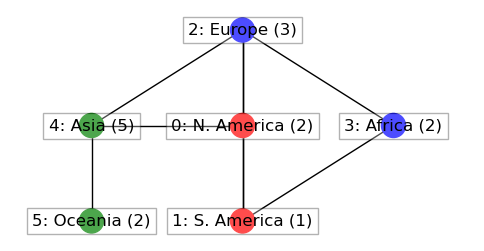

{'map_graph': [[0, 1, 1, 0, 1, 0], [1, 0, 1, 0, 0, 0], [1, 1, 0, 1, 1, 0], [0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 0]], 'layout': {0: [0.5, 0.5], 1: [0.5, 0.3], 2: [0.5, 0.7], 3: [0.7, 0.5], 4: [0.3, 0.5], 5: [0.3, 0.3]}, 'countries': {0: 'N. America', 1: 'S. America', 2: 'Europe', 3: 'Africa', 4: 'Asia', 5: 'Oceania'}, 'nb_players': 3, 'labels': {0: '0: N. America (2)', 1: '1: S. America (1)', 2: '2: Europe (3)', 3: '3: Africa (2)', 4: '4: Asia (5)', 5: '5: Oceania (2)'}, 'colors': ['red', 'red', 'blue', 'blue', 'green', 'green'], 'presence_map_start': [[2, 1, 0, 0, 0, 0], [0, 0, 3, 2, 0, 0], [0, 0, 0, 0, 5, 2]]}


In [2]:
map_graph = [
    [0, 1, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
]
G = nx.from_numpy_array(np.array(map_graph))
pos = nx.spring_layout(G)
continent_bonus = None

layout = {0: [0.5, 0.5],
           1: [0.5, 0.3],
           2: [0.5, 0.7],
           3: [0.7, 0.5],
           4: [0.3, 0.5],
           5: [0.3, 0.3]
           }

countries = {0 : "N. America",
            1 : "S. America",
            2 : "Europe",
            3 : "Africa",
            4 : "Asia",
            5 : "Oceania"
            }


# Nb player
nb_player = 3
# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map_start = [
    [2, 1, 0, 0, 0, 0],
    [0, 0, 3, 2, 0, 0],
    [0, 0, 0, 0, 5, 2]
]
owner = np.argmax(presence_map_start, axis=0)
troops = np.max(presence_map_start, axis=0)
colors = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors[i] for i in owner]
labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(len(map_graph))}

print(owner, troops)
print(colors)
print(labels)

plt.figure(figsize=(6,3))
plt.margins(x=0.2)
G = nx.from_numpy_array(np.array(map_graph))
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, layout, node_color=colors, labels=labels, bbox=label_options)
plt.show()

# Save map to json
map_dict = {}
map_dict["map_graph"] = map_graph
map_dict["layout"] = layout
map_dict["countries"] = countries
with open('./maps/map_5nodes_Continents.json', 'w') as f:
    json.dump(map_dict, f, indent=4)

map_dict["nb_players"] = nb_player
map_dict["labels"] = labels
map_dict["colors"] = colors
map_dict["presence_map_start"] = presence_map_start
with open('./maps/map_5nodes_3p_Continents.json', 'w') as f:
    json.dump(map_dict, f, indent=4)

print(map_dict)


#### Map 2: Europe, 1914

[0 0 1 0 1 2 1 2 0 2 2] [2 2 2 2 2 2 2 2 1 2 2]
['red', 'red', 'blue', 'red', 'blue', 'green', 'blue', 'green', 'red', 'green', 'green']
{0: '0: UK (2)', 1: '1: France (2)', 2: '2: Germany (2)', 3: '3: Russia (2)', 4: '4: Austria-Hungary (2)', 5: '5: Italy (2)', 6: '6: Turkey (2)', 7: '7: Iberia (2)', 8: '8: Benelux (1)', 9: '9: Scandinavia (2)', 10: '10: Balkans (2)'}


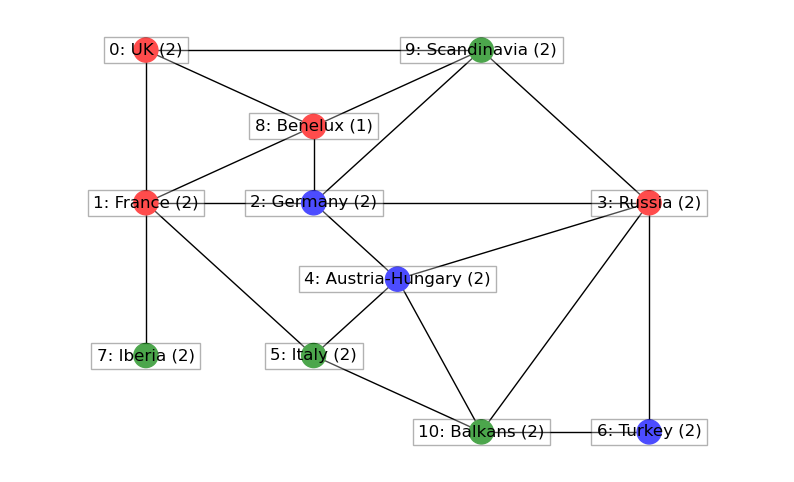

{'map_graph': [[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]], 'layout': {0: [0.1, 0.7], 1: [0.1, 0.5], 2: [0.3, 0.5], 3: [0.7, 0.5], 4: [0.4, 0.4], 5: [0.3, 0.3], 6: [0.7, 0.2], 7: [0.1, 0.3], 8: [0.3, 0.6], 9: [0.5, 0.7], 10: [0.5, 0.2]}, 'countries': {0: 'UK', 1: 'France', 2: 'Germany', 3: 'Russia', 4: 'Austria-Hungary', 5: 'Italy', 6: 'Turkey', 7: 'Iberia', 8: 'Benelux', 9: 'Scandinavia', 10: 'Balkans'}, 'nb_players': 3, 'colors': ['red', 'red', 'blue', 'red', 'blue', 'green', 'blue', 'green', 'red', 'green', 'green'], 'labels': {0: '0: UK (2)', 1: '1: France (2)', 2: '2: Germany (2)', 3: '3: Russia (2)', 4: '4: Austria-Hungary (2)', 5: '5: Italy (2)

In [ ]:
countries = {0 : "UK",
            1 : "France",
            2 : "Germany",
            3 : "Russia",
            4 : "Austria-Hungary",
            5 : "Italy",
            6 : "Turkey",
            7: "Iberia",
            8: "Benelux",
            9: "Scandinavia",
            10: "Balkans"
            }

map_graph = [
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
]
G = nx.from_numpy_array(np.array(map_graph))
pos = nx.spring_layout(G)
continent_bonus = None

layout = {0: [0.1, 0.7],
        1: [0.1, 0.5],
        2: [0.3, 0.5],
        3: [0.7, 0.5],
        4: [0.4, 0.4],
        5: [0.3, 0.3],
        6: [0.7, 0.2],
        7: [0.1, 0.3],
        8: [0.3, 0.6],
        9: [0.5, 0.7],
        10: [0.5, 0.2]
           }

# Nb player
nb_player = 3
# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map_start = [
    [2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2]
]
owner = np.argmax(presence_map_start, axis=0)
troops = np.max(presence_map_start, axis=0)
colors = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors[i] for i in owner]
labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(len(map_graph))}

print(owner, troops)
print(colors)
print(labels)

plt.figure(figsize=(10,6))
plt.margins(x=0.2)
G = nx.from_numpy_array(np.array(map_graph))
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, layout, node_color=colors, labels=labels, bbox=label_options)
# nx.draw(G, pos, node_color=colors, labels=labels, bbox=label_options)
plt.show()

# Save map to json
map_dict = {}
map_dict["map_graph"] = map_graph
map_dict["layout"] = layout
map_dict["countries"] = countries
with open('./maps/map_11nodes_Europe1914.json', 'w') as f:
    json.dump(map_dict, f, indent=4)

map_dict["nb_players"] = nb_player
map_dict["colors"] = colors
map_dict["labels"] = labels
map_dict["presence_map_start"] = presence_map_start
with open('./maps/map_11nodes_3p_Europe1914.json', 'w') as f:
    json.dump(map_dict, f, indent=4)

print(map_dict)

#### Map 3: original game map

[2 1 1 1 0 1 1 1 0 2 0 2 2 0 0 0 0 1 2 2 0 2 0 1 1 1 1 1 2 0 2 0 2 2 0 1 0
 2 2 1 2 2] [1 2 1 3 2 4 2 4 4 1 1 4 1 1 3 4 2 1 4 1 3 3 2 2 4 2 2 1 2 2 2 1 4 3 3 2 4
 2 2 2 3 4]
['green', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'green', 'red', 'green', 'green', 'red', 'red', 'red', 'red', 'blue', 'green', 'green', 'red', 'green', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'red', 'green', 'red', 'green', 'green', 'red', 'blue', 'red', 'green', 'green', 'blue', 'green', 'green']
{0: '0: Madagascar (1)', 1: '1: W. Eur (2)', 2: '2: GB (1)', 3: '3: S. Eur (3)', 4: '4: N. Eur (2)', 5: '5: Scandinavie (4)', 6: '6: Islande (2)', 7: '7: Ukraine (4)', 8: '8: Ural (4)', 9: '9: Afghanistan (1)', 10: '10: Inde (1)', 11: '11: Chine (4)', 12: '12: Siam (1)', 13: '13: Indonésie (1)', 14: '14: N-Guinée (3)', 15: '15: W. Aus (4)', 16: '16: E. Aus (2)', 17: '17: Sibérie (1)', 18: '18: Irkoutsk (4)', 19: '19: Mongolie (1)', 20: '20: Yakustsk (3)', 21: '21: Kamtchatka (3)', 2

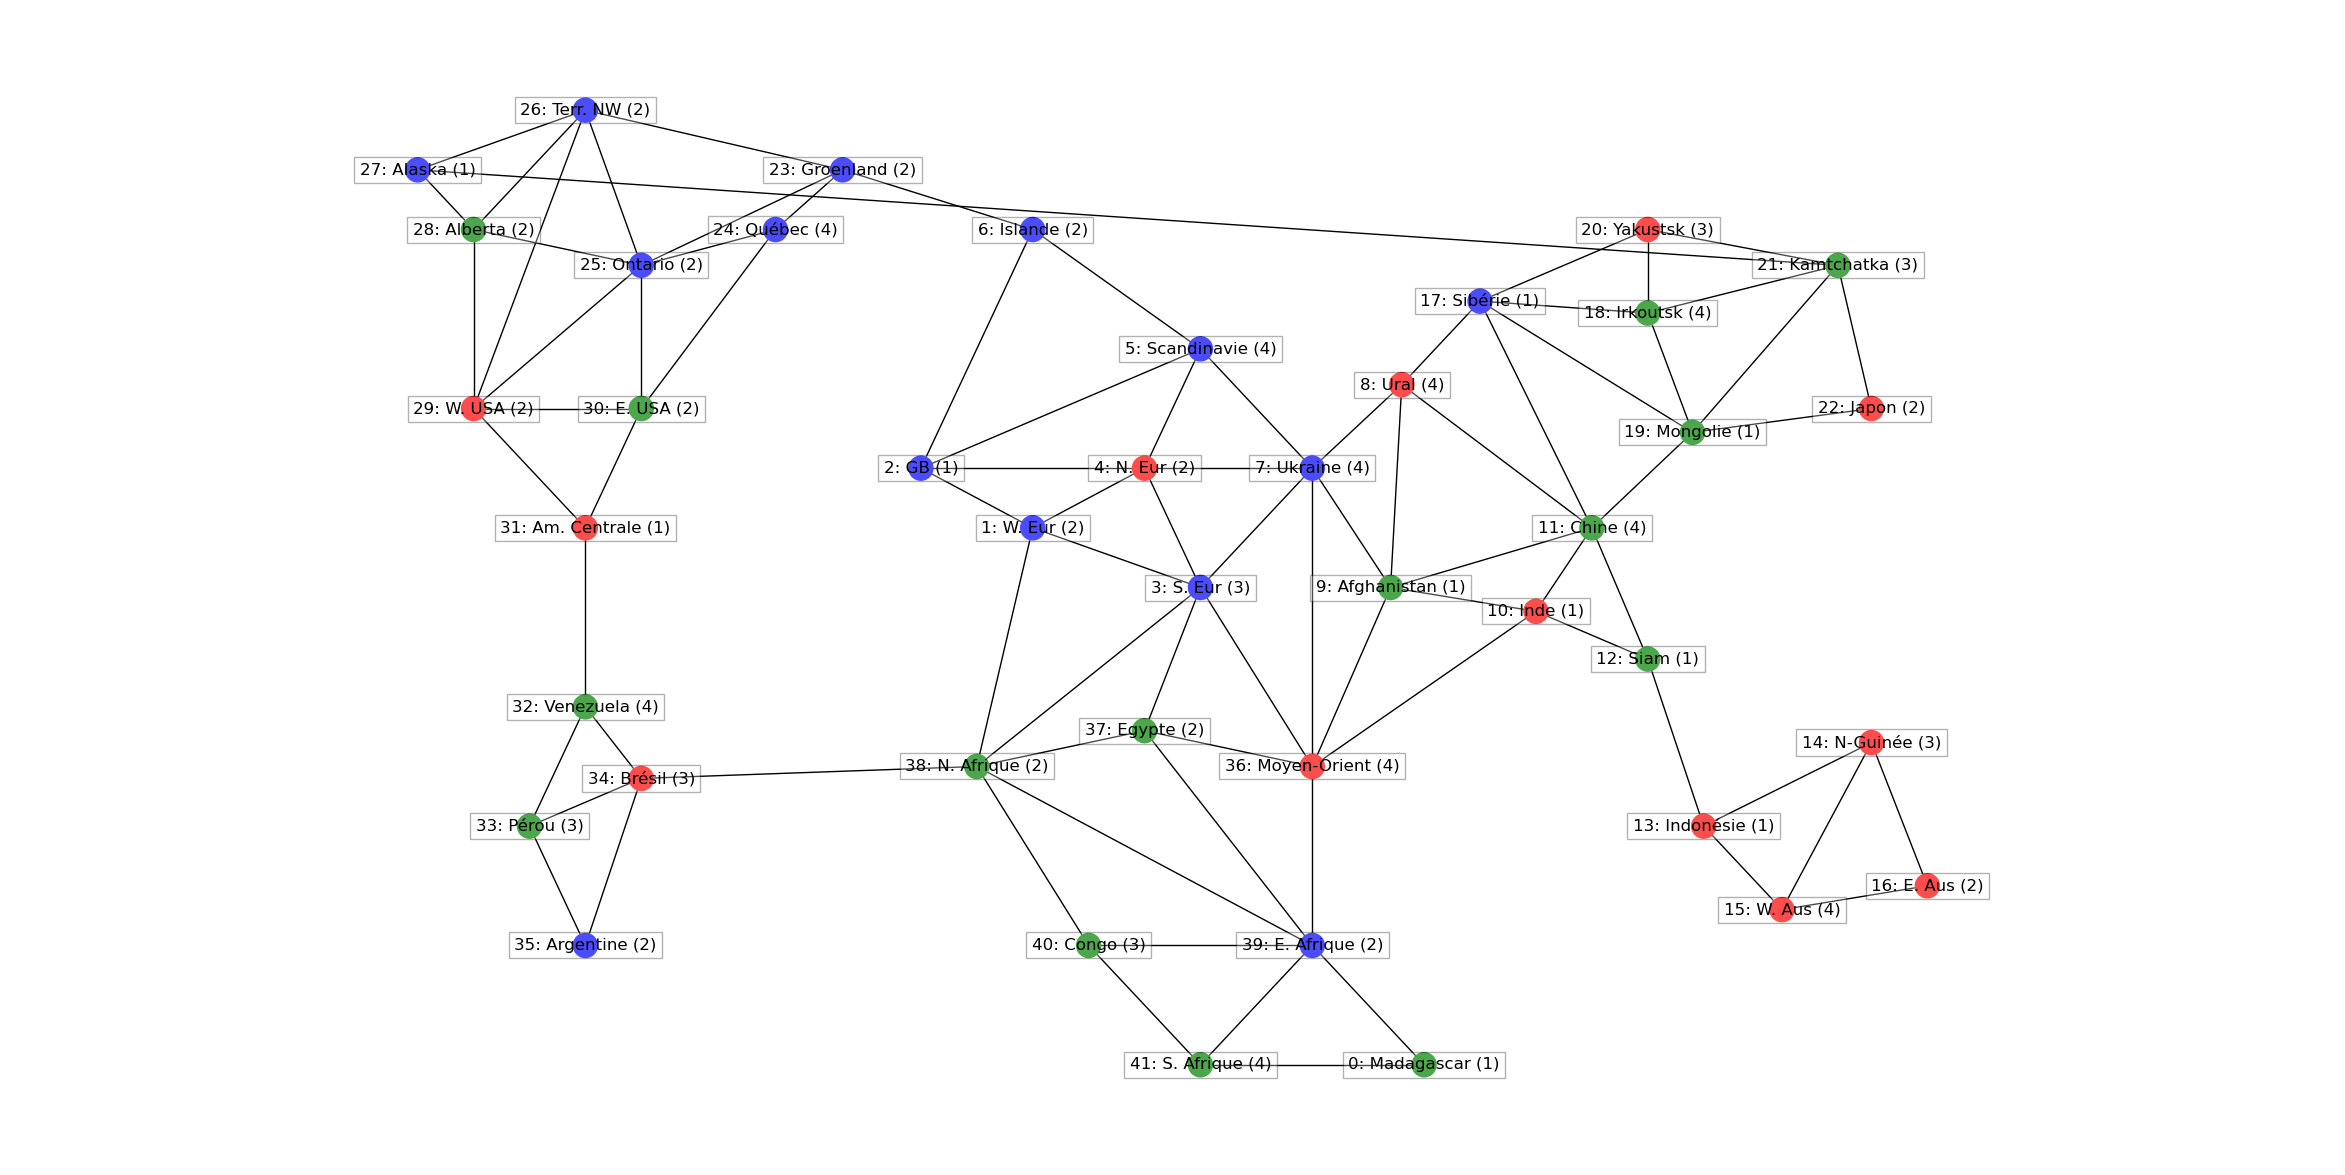

In [10]:
countries = {
    0 : "Madagascar",
    1 : "W. Eur",
    2 : "GB",
    3 : "S. Eur",
    4 : "N. Eur",
    5 : "Scandinavie",
    6 : "Islande",
    7 : "Ukraine",
    8 : "Ural",
    9 : "Afghanistan",
    10 : "Inde",
    11 : "Chine",
    12 : "Siam",
    13 : "Indonésie",
    14 : "N-Guinée",
    15 : "W. Aus",
    16 : "E. Aus",
    17 : "Sibérie",
    18 : "Irkoutsk",
    19 : "Mongolie",
    20 : "Yakustsk",
    21 : "Kamtchatka",
    22 : "Japon",
    23 : "Groenland",
    24 : "Québec",
    25 : "Ontario",
    26 : "Terr. NW",
    27 : "Alaska",
    28 : "Alberta",
    29 : "W. USA",
    30 : "E. USA",
    31 : "Am. Centrale",
    32 : "Venezuela",
    33 : "Pérou",
    34 : "Brésil",
    35 : "Argentine",
    36 : "Moyen-Orient",
    37 : "Egypte",
    38 : "N. Afrique",
    39 : "E. Afrique",
    40 : "Congo",
    41 : "S. Afrique",
}

map_graph = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], # Madagascar (0)
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], # W. Eur (1)
    [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # GB (2)
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], # S. Eur (3)
    [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # N. Eur (4)
    [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Scandinavie (5)
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Islande (6)
    [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # Ukraine (7)
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Ural (8)
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # Afghanistan (9)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # Inde (10)
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Chine (11)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Siam (12)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Indonésie (13)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # N-Guinée (14)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # W. Aus (15)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # E. Aus (16)
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Sibérie (17)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Irkoutsk (18)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Mongolie (19)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Yakustsk (20)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Kamtchatka (21)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Japon (22)
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Groenland (23)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Québec (24)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Ontario (25)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Terr. NW (26)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Alaska (27)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Alberta (28)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # W. USA (29)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # E. USA (30)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Am. Centrale (31)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # Venezuela (32)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # Pérou (33)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], # Brésil (34)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # Argentine (35)
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # Moyen-Orient (36)
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # Egypte (37)
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], # N. Afrique (38)
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1], # E. Afrique (39)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # Congo (40)
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], # S. Afrique (41)
]

# Layout so that the map looks like a real map
layout = {
    1: [-1.5, 0.5],
    2: [-2.5, 1],
    3: [0, 0],
    4: [-0.5, 1],
    5: [0, 2],
    6: [-1.5, 3],
    7: [1, 1],
    8: [1.8, 1.7],
    9: [1.7, 0],
    10: [3, -0.2],
    11: [3.5, 0.5],
    12: [4, -0.6],
    13: [4.5, -2],
    14: [6, -1.3],
    15: [5.2, -2.7],
    16: [6.5, -2.5],
    17: [2.5, 2.4],
    18: [4, 2.3],
    19: [4.4, 1.3],
    20: [4, 3],
    21: [5.7, 2.7],
    22: [6, 1.5],
    23: [-3.2, 3.5],
    24: [-3.8, 3],
    25: [-5, 2.7],
    26: [-5.5, 4],
    27: [-7, 3.5],
    28: [-6.5, 3],
    29: [-6.5, 1.5],
    30: [-5, 1.5],
    31: [-5.5, 0.5],
    32: [-5.5, -1],
    33: [-6, -2],
    34: [-5, -1.6],
    35: [-5.5, -3],
    36: [1, -1.5],
    37: [-0.5, -1.2],
    38: [-2, -1.5],
    39: [1, -3],
    40: [-1, -3],
    41: [0, -4],
    0: [2, -4],
}
continent_bonus = {"Oceania":([13, 14, 15, 16], 2),
                   "Asia":([9, 10, 11, 12, 17, 18, 19, 20, 21, 22], 7),
                   "Europe":([1, 2, 3, 4, 5, 6, 7, 8], 5),
                   "North America":([23, 24, 25, 26, 27, 28, 29, 30, 31], 5),
                   "South America":([32, 33, 34, 35], 2),
                   "Africa":([36, 37, 38, 39, 40, 41], 3)}

# Nb player
nb_player = 3
# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map_start = [[0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 1, 0, 0, 1, 3, 4, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0],
                      [0, 2, 1, 3, 0, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 4, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0],
                      [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 1, 0, 0, 0, 0, 0, 4, 1, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 4, 3, 0, 0, 0, 2, 2, 0, 3, 4]]

owner = np.argmax(presence_map_start, axis=0)
troops = np.max(presence_map_start, axis=0)
colors_map = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors_map[i] for i in owner]
labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(len(map_graph))}
print(owner, troops)
print(colors)
print(labels)

plt.figure(figsize=(30, 15))
plt.margins(x=0.2)
G = nx.from_numpy_array(np.array(map_graph))
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, layout, node_color=colors, labels=labels, bbox=label_options)
plt.show()

# Save map to json
map_dict = {}
map_dict["map_graph"] = map_graph
map_dict["layout"] = layout
map_dict["countries"] = countries
with open('./maps/map_42nodes_Original.json', 'w') as f:
    json.dump(map_dict, f, indent=4)

map_dict["nb_players"] = nb_player
map_dict["colors"] = colors
map_dict["labels"] = labels
map_dict["presence_map_start"] = presence_map_start
with open('./maps/map_42nodes_3p_Original.json', 'w') as f:
    json.dump(map_dict, f, indent=4)


,country,geometry,player,troops,color
0,Alaska,"MULTIPOLYGON (((-18751322.511 6998629.337, -18...",2,2,green
1,Alberta,"MULTIPOLYGON (((-13907217.908 6384705.956, -13...",2,2,green
2,Am. Centrale,"MULTIPOLYGON (((-9233647.372 913898.175, -9244...",2,3,green
3,Argentine,"MULTIPOLYGON (((-8091312.631 -7086870.417, -80...",1,1,blue
4,Brésil,"MULTIPOLYGON (((-7394870.066 91472.100, -73857...",0,2,red


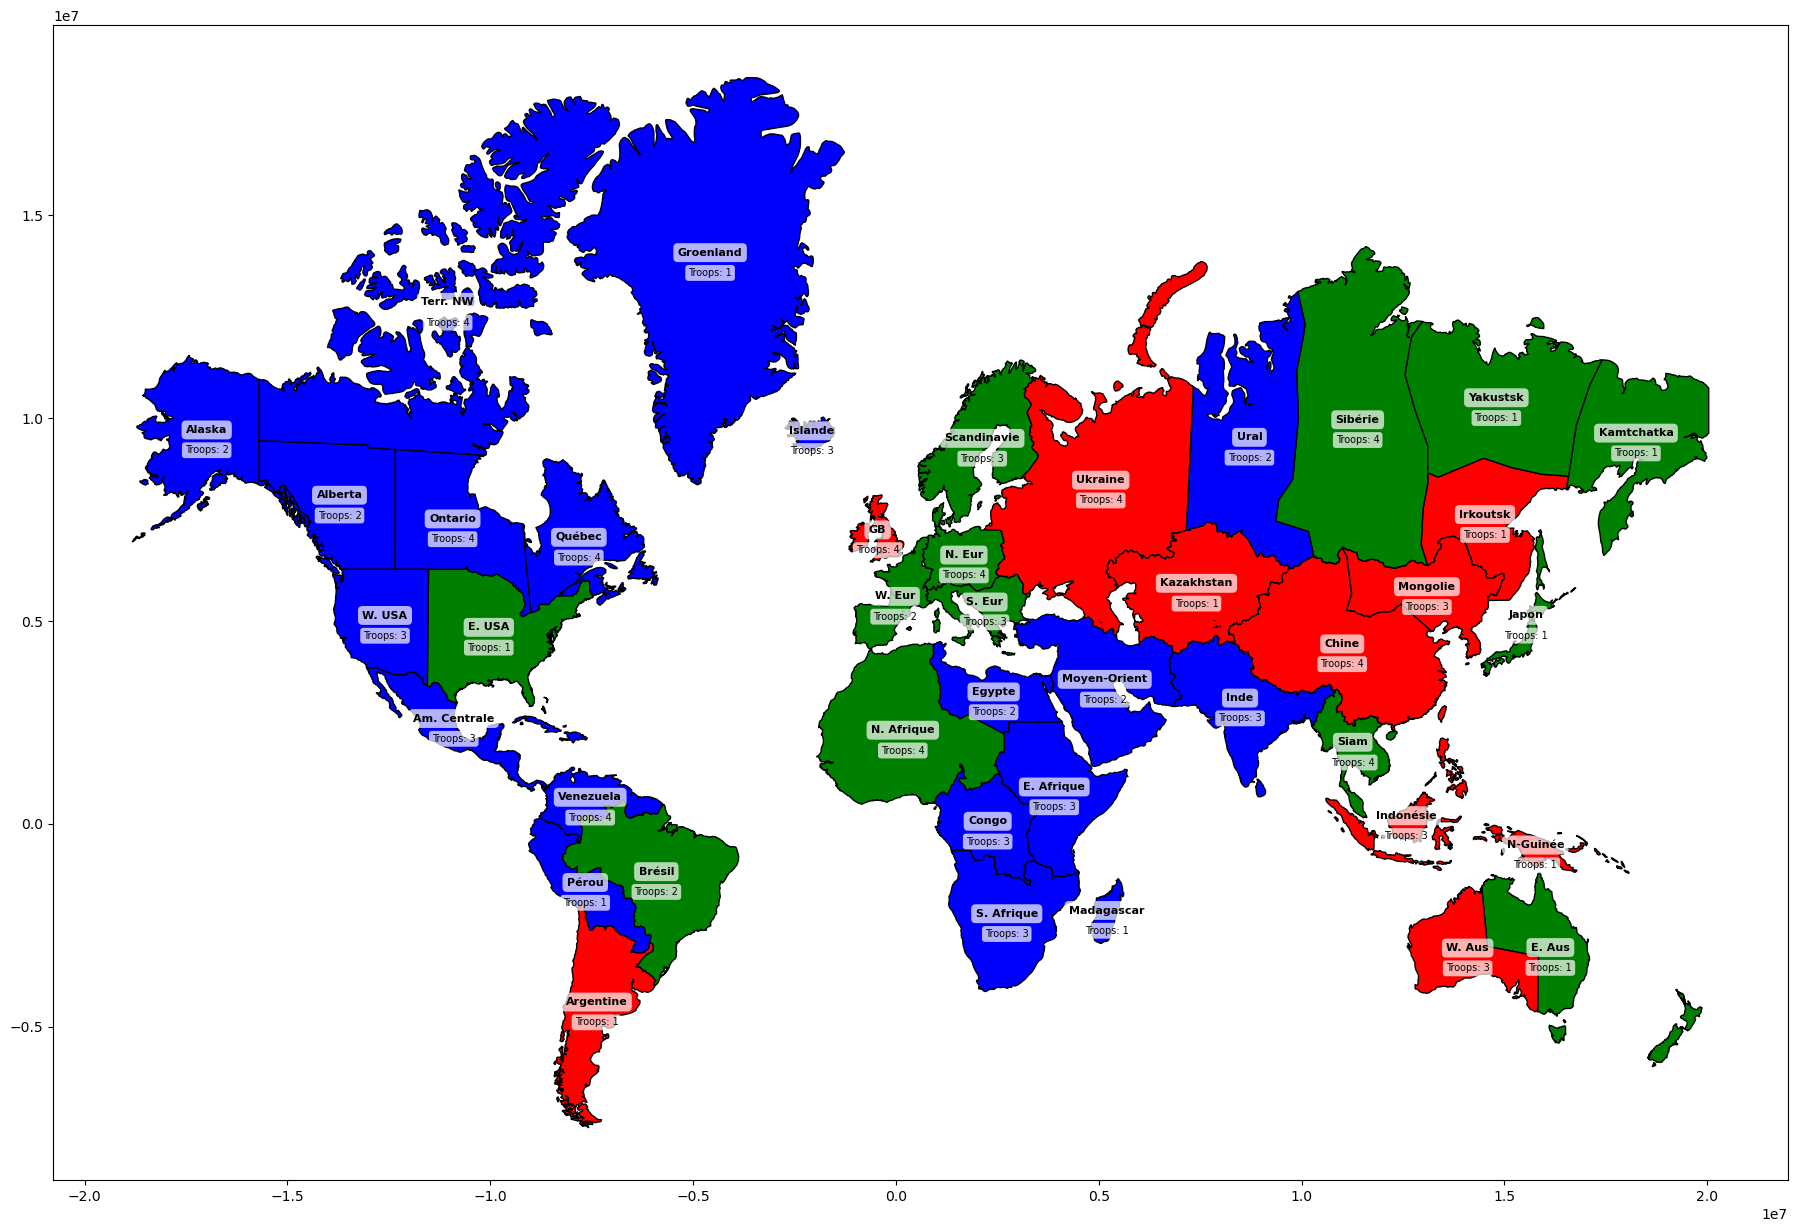

In [57]:
full_map = []

countries = "./gpkg/Countries/"
name_to_country = {
    "alberta": "Alberta",
    "alaska": "Alaska",
    "argentine": "Argentine",
    "am_centrale": "Am. Centrale",
    "bresil": "Brésil",
    "chine": "Chine",
    "congo": "Congo",
    "egypte": "Egypte",
    "east_af": "E. Afrique",
    "east_usa": "E. USA",
    "east_aus": "E. Aus",
    "gb": "GB",
    "groenland": "Groenland",
    "inde": "Inde",
    "indonesie": "Indonésie",
    "irkutsk": "Irkoutsk",
    "islande": "Islande",
    "japon": "Japon",
    "kamtchatka": "Kamtchatka",
    "kazakhstan": "Kazakhstan",
    "madagascar": "Madagascar",
    "mongolie": "Mongolie",
    "moyen_orient": "Moyen-Orient",
    "north_eur": "N. Eur",
    "nv_guinee": "N-Guinée",
    "north_af": "N. Afrique",
    "nw_terr": "Terr. NW",
    "ontario": "Ontario",
    "perou": "Pérou",
    "quebec": "Québec",
    "siam": "Siam",
    "siberie": "Sibérie",
    "south_af": "S. Afrique",
    "south_eur": "S. Eur",
    "scandinavie": "Scandinavie",
    "siam": "Siam",
    "ural": "Ural",
    "ukraine": "Ukraine",
    "venezuela": "Venezuela",
    "west_usa": "W. USA",
    "west_aus": "W. Aus",
    "west_eur": "W. Eur",
    "yakutsk": "Yakustsk",    
}

for country_gpkg in os.listdir(countries):
    country = country_gpkg.split(".")[0]
    country = name_to_country[country]
    country_gdf = gpd.read_file(os.path.join(countries, country_gpkg))
    country_gdf["country"] = country
    country_gdf = country_gdf[['country', 'geometry']]
    full_map.append(country_gdf)

full_map = pd.concat(full_map, ignore_index=True)
full_map = gpd.GeoDataFrame(full_map, geometry='geometry')
full_map.to_crs(epsg=3857, inplace=True)

# Random player between 0 and 2
full_map["player"] = np.random.randint(0, 3, len(full_map))
full_map["troops"] = np.random.randint(1, 5, len(full_map))
full_map["color"] = full_map["player"].apply(lambda x: colors_map[x])

display(full_map.head())

# Plot map with color and troops from full_map
full_map.plot(column='color', figsize=(30, 15), edgecolor='black', linewidth=1,
              cmap=ListedColormap(['red', 'blue', 'green']))

# Add country names and troops numbers inside each polygon
for idx, row in full_map.iterrows():
    # Calculate centroid of each polygon
    centroid = row['geometry'].centroid
    # Add country name
    plt.text(centroid.x, centroid.y, row['country'], fontsize=8, ha='center', fontweight='bold', bbox=dict(facecolor='white', alpha=0.7,
                                                                                                           edgecolor='none', pad=0.4, boxstyle='round'))
    # Add troops number
    plt.text(centroid.x, centroid.y - 500000, f"Troops: {row['troops']}", fontsize=7, ha='center', bbox=dict(facecolor='white', alpha=0.7,
                                                                                                           edgecolor='none', pad=0.3, boxstyle='round'))

# Show the plot
plt.show()